In [2]:
import pandas as pd

# 读取数据集
data = pd.read_csv("/Users/renyijing/Desktop/diabetes/diabetes.csv",encoding="GB2312")
data.head(5)

,id,性别,年龄,体检日期,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
0,1,男,41,12/10/2017,24.96,23.10,99.59,20.23,76.88,49.60,...,166.0,9.9,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06
1,2,男,41,19/10/2017,24.57,36.25,67.21,79.00,79.43,47.76,...,277.0,9.2,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39
2,3,男,46,26/10/2017,20.82,15.23,63.69,38.17,86.23,48.00,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
3,4,女,22,25/10/2017,14.99,10.59,74.08,20.22,70.98,44.02,...,252.0,10.3,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30
4,5,女,48,26/10/2017,20.07,14.78,75.79,22.72,78.05,41.83,...,316.0,11.1,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42


# 数据清洗

### 重复值、缺失值处理

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl

print("共有重复行：", data.duplicated().sum())  #统计重复值

print(data.isnull().any())  # 判断哪些列包含缺失值
print(data.isnull().sum())  # 判断每列缺失值的数量
missdata = data.isnull().sum()
print(round(missdata.describe()))  #统计缺失值

In [ ]:
# 显示各特征缺失比例
null_percentage = (data.isnull().sum() / len(data)).apply(lambda x: '{:.2%}'.format(x))  # 计算每列缺失比例
print (null_percentage)


In [ ]:
# 查看血糖值是否有非均衡性的共性
sns.set()
ax = sns.histplot(data["血糖"], kde=False, bins=300)
ax.set_title("Histogram of blood glucose data")
ax.set_xlabel("Blood glucose values")
ax.set_ylabel("proportion")

total_samples = len(data["血糖"])
relative_frequencies = (ax.get_yticks() / total_samples) * 100
# 将y轴标签设置为百分比格式
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels([f"{freq:.2f}%" for freq in relative_frequencies])

plt.xlim(0, 18)
plt.show()

In [ ]:
# 训练集
train = pd.read_csv("/Users/renyijing/Desktop/diabetes/diabetes.csv",encoding="GB2312")
# 测试集
test = pd.read_csv("/Users/renyijing/Desktop/diabetes/diabetes.csv",encoding="GB2312")

# 删除训练集缺失率过大特征、无效的时间特征
del_feat=['乙肝表面抗原', '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体', '乙肝核心抗体', '体检日期']
feat=[]
for i in train.columns:
    if i not in del_feat:
        feat.append(i)
train=train[feat]

# 删除测试集'血糖'属性
feat.remove('血糖') 
test=test[feat]

train['性别'] = train['性别'].map({'男':1,'女':0})  # 训练集替换字符为数字
test['性别'] = test['性别'].map({'男':1,'女':0})  # 测试集替换字符为数字

y_train = train["血糖"]
x_train = train.drop(['id','血糖','白细胞计数','红细胞计数','血红蛋白','红细胞压积','红细胞平均体积','红细胞平均血红蛋白量','红细胞平均血红蛋白浓度','红细胞体积分布宽度','血小板计数',
         '血小板平均体积','血小板体积分布宽度','血小板比积','中性粒细胞%','淋巴细胞%','单核细胞%','嗜酸细胞%','嗜碱细胞%'], axis=1)
x_test = test.drop(['id','白细胞计数','红细胞计数','血红蛋白','红细胞压积','红细胞平均体积','红细胞平均血红蛋白量','红细胞平均血红蛋白浓度','红细胞体积分布宽度','血小板计数',
         '血小板平均体积','血小板体积分布宽度','血小板比积','中性粒细胞%','淋巴细胞%','单核细胞%','嗜酸细胞%','嗜碱细胞%'], axis=1)

In [ ]:
# 用平均值代替缺失值
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())
data = x_train
null_percentagee = (data.isnull().sum() / len(data)).apply(lambda x: '{:.2%}'.format(x))  # 计算每列缺失比例
print (null_percentagee)

### 异常值分析处理

In [ ]:
# 删除血糖值特别大的异常值
columns=len(train.columns)
train.drop(train.index[[i for i in train.index if train.iloc[i,columns-1]>12]],inplace=True)

# 数据分析

### 年龄统计

In [ ]:
df1 = pd.DataFrame()
df1['年龄'] = data['年龄']

# 创建年龄段
bins = [0, 18, 35, 50, 65, 99] # 自定义的年龄段范围
labels = ['0-18', '18-35', '35-50', '50-65', '65-99']
df1['年龄段'] = pd.cut(df1['年龄'], bins=bins, labels=labels, right=False)

# 计算每个年龄段的人数
age_counts = df1['年龄段'].value_counts()

# 计算每个年龄段的比例
age_proportions = age_counts / age_counts.sum()
age_percentage = age_proportions.apply(lambda x: '{:.2%}'.format(x))

# 打印结果
print("每个年龄段的人数：\n", age_counts)
print("\n每个年龄段的比例：\n", age_percentage)

### 各年龄段性别比例统计

In [ ]:
df2 = pd.DataFrame()
df2['年龄'] = data['年龄']
df2['性别'] = data['性别']

# 创建年龄段
bins = [0, 18, 35, 50, 65, 99] # 自定义的年龄段范围
labels = ['0-18', '18-35', '35-50', '50-65', '65-99']
df2['年龄段'] = pd.cut(df2['年龄'], bins=bins, labels=labels, right=False)

# 统计每个年龄段的人数和男女比例
age_gender_counts = df2.groupby(['年龄段', '性别']).size().unstack().fillna(0)
age_gender_proportions = age_gender_counts.div(age_gender_counts.sum(axis=1), axis=0)

# 打印结果
print("每个年龄段的人数：\n", age_gende_counts)
print("\n每个年龄段的男女比例：\n", age_gender_proportions)

### 患者男女比例

In [ ]:
df3 = pd.DataFrame()
df3['性别'] = data['性别']
gender_counts = df3['性别'].value_counts()

# 计算男女比例
total_count = gender_counts.sum()
male_percentage = (gender_counts.get('男', 0) / total_count) * 100
female_percentage = (gender_counts.get('女', 0) / total_count) * 100

print(f"男性占比: {male_percentage:.2f}%")
print(f"女性占比: {female_percentage:.2f}%")

### 患者血糖分析

In [ ]:
df4 = pd.DataFrame()
df4['血糖'] = data['血糖']
# 定义血糖范围
ranges = [3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

# 使用cut函数将血糖值分到不同的范围
df4['血糖范围'] = pd.cut(df4['血糖'], bins=ranges)

# 统计每个范围内的样本数量
range_counts = df4['血糖范围'].value_counts().sort_index()
print(range_counts)
# 绘制条形图
range_counts.plot(kind='bar', edgecolor='black')
plt.title('血糖范围分布')
plt.xlabel('血糖范围')
plt.ylabel('样本数量')
plt.xticks(rotation=45)
plt.show()

### 平均值分析

In [5]:
df5 = pd.DataFrame()
df5 = pd.DataFrame(data, columns=['*天门冬氨酸氨基转换酶','*丙氨酸氨基转换酶','*碱性磷酸酶','*r-谷氨酰基转换酶','*总蛋白','白蛋白','*球蛋白','白球比例'])

columns_means = df5.mean()
print(columns_means)

*天门冬氨酸氨基转换酶    26.805892
*丙氨酸氨基转换酶      27.652020
*碱性磷酸酶         87.482278
*r-谷氨酰基转换酶     38.823762
*总蛋白           76.771108
白蛋白            45.822504
*球蛋白           30.948604
白球比例            1.502538
dtype: float64


In [3]:
df6 = pd.DataFrame()
df6 = pd.DataFrame(data, columns=['甘油三酯','总胆固醇','高密度脂蛋白胆固醇','低密度脂蛋白胆固醇'])

column_means = df6.mean()
print(column_means)

甘油三酯         1.846005
总胆固醇         5.230631
高密度脂蛋白胆固醇    1.390036
低密度脂蛋白胆固醇    3.362935
dtype: float64


In [6]:
df7 = pd.DataFrame()
df7 = pd.DataFrame(data, columns=['白细胞计数','红细胞计数','血红蛋白','红细胞平均体积','血小板计数','血小板平均体积'])

column_means = df7.mean()
print(column_means)

白细胞计数        6.589197
红细胞计数        4.957087
血红蛋白       147.978973
红细胞平均体积     89.048134
血小板计数      253.085318
血小板平均体积     10.653444
dtype: float64


### 词云

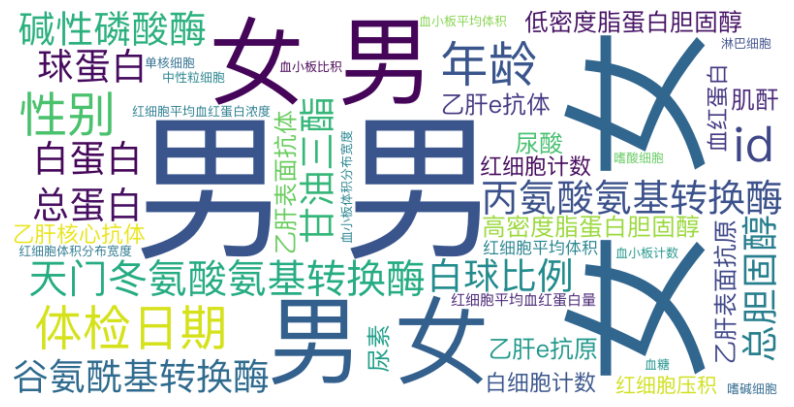

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

f = open('/Users/renyijing/Desktop/diabetes/diabetes.csv','r',encoding='GB2312')
txt = f.read()

# 创建WordCloud对象
wordcloud = WordCloud(font_path='/System/Library/Fonts/PingFang.ttc',width=800, height=400, background_color='white').generate(txt)

# 绘制词云图像
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 隐藏坐标轴
plt.show()